# Making the Dataset Figures

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from datasets import load_dataset

ds = load_dataset("wanglab/kegg")

README.md:   0%|          | 0.00/2.82k [00:00<?, ?B/s]

Repo card metadata block was not found. Setting CardData to empty.
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


train-00000-of-00001.parquet:   0%|          | 0.00/6.28M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


test-00000-of-00001.parquet:   0%|          | 0.00/966k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


val-00000-of-00001.parquet:   0%|          | 0.00/971k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1159 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/146 [00:00<?, ? examples/s]

Generating val split:   0%|          | 0/144 [00:00<?, ? examples/s]

In [24]:
len(set(ds['train']['answer'] + ds['test']['answer'] + ds['val']['answer']))

37

In [9]:
len(ds['train'])

1159

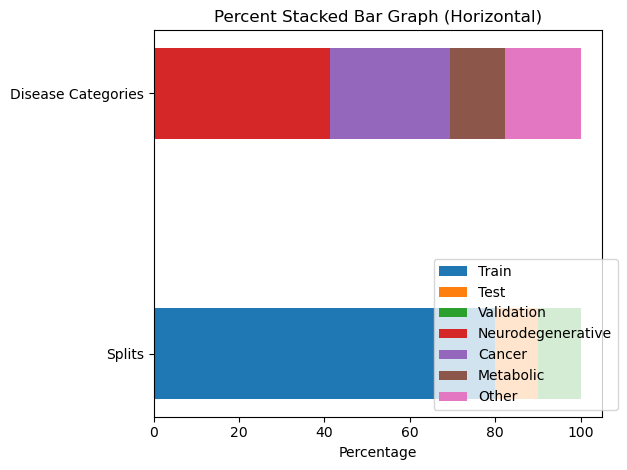

In [25]:
bars = ['Splits', 'Disease Categories']
split_subcategories = ['Train', 'Test', 'Validation']
disease_subcategories = ['Neurodegenerative', 'Cancer', 'Metabolic', 'Other']

# Create data arrays
split_counts = np.array([len(ds['train']), len(ds['test']), len(ds['val'])])
disease_counts = np.array([41.3, 28.2, 12.7, 17.8])

# Convert to percentage
split_perc = split_counts / split_counts.sum() * 100
disease_perc = disease_counts / disease_counts.sum() * 100

fig, ax = plt.subplots()
bar_height = 0.35
y = np.arange(len(bars))  # [0, 1]

# Plot "Splits" as a horizontal stacked bar
left = 0
for i, val in enumerate(split_perc):
    ax.barh(y[0], val, left=left, height=bar_height, label=split_subcategories[i])
    left += val

# Plot "Disease Categories" as a horizontal stacked bar
left = 0
for i, val in enumerate(disease_perc):
    ax.barh(y[1], val, left=left, height=bar_height, label=disease_subcategories[i])
    left += val

# Labels and legend
ax.set_yticks(y)
ax.set_yticklabels(bars)
ax.set_xlabel('Percentage')
ax.set_title('Percent Stacked Bar Graph (Horizontal)')
ax.legend(loc='lower right', bbox_to_anchor=(1.05, 0))

plt.tight_layout()
plt.savefig("stacked_bar_graph.svg", format="svg")  # Save as SVG
plt.show()

# Task 2 and 5 Disease Distribution

In [37]:
from datasets import load_dataset

ds = load_dataset("wanglab/bioR_tasks", 'variant_effect_coding')

In [38]:
disease = (ds['train']['answer'] + ds['test']['answer'])

In [39]:
from collections import Counter

# Count occurrences of each disease name
disease_counts = Counter(ds['train']['answer'] + ds['test']['answer'])

# Write to TSV file
with open("VEP_1_labels.tsv", "w") as f:
    f.write("Disease\tCount\n")  # Header
    for disease, count in disease_counts.most_common():  # sorted by count
        f.write(f"{disease}\t{count}\n")

In [59]:
from datasets import load_dataset

ds = load_dataset("wanglab/bioR_tasks", 'task5_variant_effect_non_snv')

In [60]:
answer = (ds['train']['answer'] + ds['test']['answer'])

In [42]:
from collections import Counter

# Count occurrences of each disease name
disease_counts = Counter(ds['train']['answer'] + ds['test']['answer'])

# Write to TSV file
with open("VEP_Non_SNV_labels.tsv", "w") as f:
    f.write("Disease\tCount\n")  # Header
    for disease, count in disease_counts.most_common():  # sorted by count
        f.write(f"{disease}\t{count}\n")

In [63]:
from datasets import load_dataset

ds = load_dataset("wanglab/bioR_tasks", 'kegg_variant_2k')

In [44]:
from collections import Counter

# Count occurrences of each disease name
disease_counts = Counter(ds['train']['answer'])

# Write to TSV file
with open("KEGG_disease_labels.tsv", "w") as f:
    f.write("Disease\tCount\n")  # Header
    for disease, count in disease_counts.most_common():  # sorted by count
        f.write(f"{disease}\t{count}\n")

ChatGPT classified these answer into the 8 categories. Now I am creating the stacked bar plots

Keyword Classifier

In [ ]:
# Reuse the improved keyword-based classification function from earlier

def keyword_based_classify(disease):
    disease_lower = disease.lower()

    if any(keyword in disease_lower for keyword in [
        "alzheimer", "parkinson", "neuro", "ataxia", "epilepsy", "intellectual", "cerebellar",
        "brain", "dystonia", "charcot", "myasthenic", "autism", "spinocerebellar",
        "als", "developmental", "leuko", "hypotonia", "encephalopathy", "seizure",
        "microcephaly", "prion", "huntington", "myopathy", "spinal", "sma"]):
        return "Neurological & Neurodevelopmental"

    elif any(keyword in disease_lower for keyword in [
        "cancer", "leukemia", "lymphoma", "tumor", "carcinoma", "adenocarcinoma",
        "sarcoma", "neoplasm", "pheochromocytoma", "adenoma", "glioblastoma", "melanoma"]):
        return "Oncological / Cancer"

    elif any(keyword in disease_lower for keyword in [
        "metabolic", "glycogen", "storage", "diabetes", "hypercholesterolemia",
        "hypophosphatasia", "acyl", "cobalamin", "lipodystrophy", "maple syrup",
        "homocystinuria", "porphyria", "gaucher", "phgdh", "thyroid", "adrenal",
        "lipoprotein", "hypomagnesemia", "coenzyme", "desmosterolosis", "biogenesis",
        "hemochromatosis", "mitochondrial", "pyruvate", "oxidative", "ketosis",
        "aldosteronism", "cushing", "lesch", "dyshormonogenesis"]):
        return "Metabolic / Mitochondrial"

    elif any(keyword in disease_lower for keyword in [
        "cardio", "heart", "aortic", "arrhythmia", "ventricular", "artery", "hypertension",
        "thrombocythemia", "fibrillation", "cardiomyopathy", "vascular", "anemia",
        "thrombocytopenia", "myelofibrosis", "blood", "hypotension", "fanconi"]):
        return "Cardiovascular & Hematological"

    elif any(keyword in disease_lower for keyword in [
        "immunodeficiency", "scid", "autoimmune", "inflammation", "inflammatory",
        "neutropenia", "immune", "lymphoproliferation", "cytokine", "common_variable",
        "deficiency", "immunologic"]):
        return "Immunological & Hematopoietic"

    elif any(keyword in disease_lower for keyword in [
        "ehlers", "dysplasia", "dystrophy", "muscular", "osteogenesis", "fibrochondrogenesis",
        "connective", "skeletal", "bone", "myopathy", "chondrodysplasia", "hypochondroplasia",
        "marfan"]):
        return "Musculoskeletal & Connective Tissue"

    elif any(keyword in disease_lower for keyword in [
        "deafness", "hearing", "retinitis", "macular", "amaurosis", "dystrophy",
        "cone-rod", "stargardt", "vision", "optic", "blindness", "retina", "eye",
        "corneal", "cataract"]):
        return "Sensory Disorders"

    elif disease_lower == "benign":
        return "Benign"

    else:
        return "Other / Multisystem / Syndromic"

# Reclassify the diseases in the dataframe
disease_df["Keyword_Category"] = disease_df["Disease"].apply(keyword_based_classify)

# Save to file
keyword_classified_path = "/mnt/data/VEP_Non_SNV_labels_keyword_classified.tsv"
disease_df.to_csv(keyword_classified_path, sep="\t", index=False)

tools.display_dataframe_to_user(name="Keyword Classified VEP Non-SNV", dataframe=disease_df)

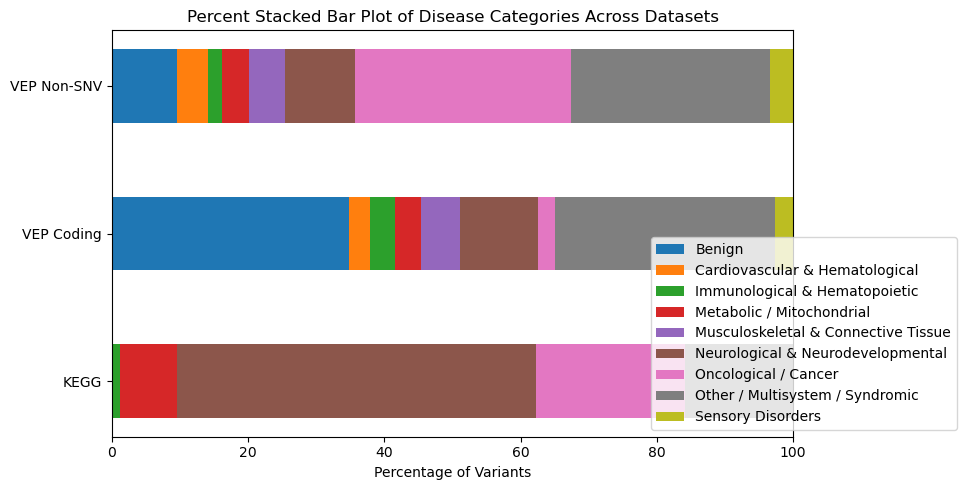

In [78]:
import matplotlib.pyplot as plt
import numpy as np

# Disease categories
categories = [
    "Benign",
    "Cardiovascular & Hematological",
    "Immunological & Hematopoietic",
    "Metabolic / Mitochondrial",
    "Musculoskeletal & Connective Tissue",
    "Neurological & Neurodevelopmental",
    "Oncological / Cancer",
    "Other / Multisystem / Syndromic",
    "Sensory Disorders"
]

# Raw counts per dataset
kegg_counts = [0, 0, 17, 121, 0, 764, 316, 231, 0]
vep_coding_counts = [17398, 1550, 1876, 1863, 2887, 5715, 1254, 16199, 1341]
vep_non_snv_counts = [6559, 3145, 1439, 2781, 3605, 7147, 21932, 20197, 2320]

datasets = [kegg_counts, vep_coding_counts, vep_non_snv_counts]
dataset_labels = ['KEGG', 'VEP Coding', 'VEP Non-SNV']

# Convert counts to percentages
datasets_perc = []
for data in datasets:
    total = sum(data)
    perc = [val / total * 100 if total > 0 else 0 for val in data]
    datasets_perc.append(perc)

# Plotting
fig, ax = plt.subplots(figsize=(10, 5))
y = np.arange(len(datasets_perc))
bar_height = 0.5

for i, category in enumerate(categories):
    values = [d[i] for d in datasets_perc]
    left = np.sum([d[:i] for d in datasets_perc], axis=1) if i > 0 else np.zeros(len(datasets_perc))
    ax.barh(y, values, left=left, height=bar_height, label=category)

# Axes and formatting
ax.set_yticks(y)
ax.set_yticklabels(dataset_labels)
ax.set_xlabel("Percentage of Variants")
ax.set_title("Percent Stacked Bar Plot of Disease Categories Across Datasets")
ax.legend(loc='lower right', bbox_to_anchor=(1.25, 0))

plt.tight_layout()
plt.savefig("three_stacked_bar_plots_percent.svg", format="svg")
plt.show()